### Building a Machine Learning Classification model to analyse whether the model is predicting the customer got the Loan or not based on various features that contributes the prediction.

### Importing the required libraries

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Loadin the dataset

In [281]:
bank_df = pd.read_csv('Bank_dataset.csv')

In [282]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### Getting an insight from a bar chart, how much amount of loan a borrower got based on job title and the account balance.
### The insight gained is, the retired person who holds the sum of $80,000 got the loan.

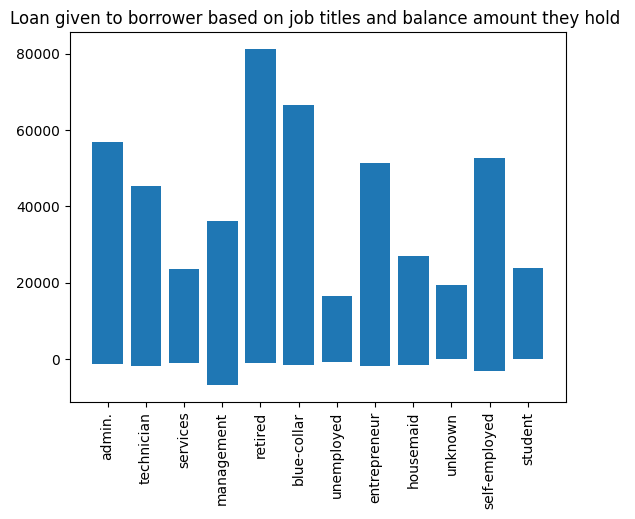

### Analysing age limit of people who are defaulters
#### People who are aged less than 70 years are defaulters.

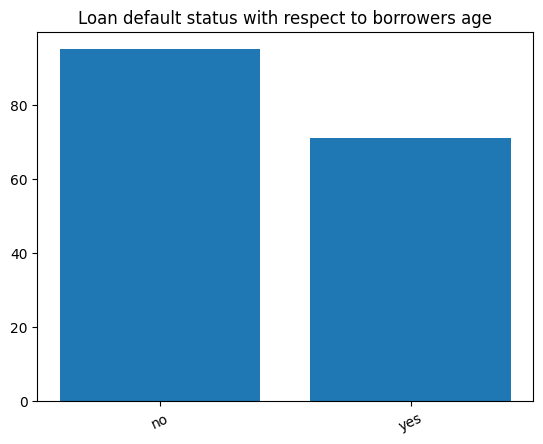

#### Before initiating the data cleaning process we need to make a copy of dataset.
#### Analysed the null values in the coulms and there were no null values found.

In [283]:
cleaned_bank_df=bank_df.copy()

In [284]:
cleaned_bank_df.isna().sum().sum()

0

In [286]:
cleaned_bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#### Dropping the unrequired columns such as 'contact', 'poutcome'

In [287]:
cleaned_bank_df=cleaned_bank_df.drop('contact', axis=1)
cleaned_bank_df=cleaned_bank_df.drop('poutcome', axis=1)


#### Using LabelEncoder on categorical columns to encode the data

In [288]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'month' column
cleaned_bank_df['month'] = label_encoder.fit_transform(cleaned_bank_df['month'])
cleaned_bank_df['job'] = label_encoder.fit_transform(cleaned_bank_df['job'])
cleaned_bank_df['education'] = label_encoder.fit_transform(cleaned_bank_df['education'])
cleaned_bank_df['marital'] = label_encoder.fit_transform(cleaned_bank_df['marital'])
cleaned_bank_df['housing'] = label_encoder.fit_transform(cleaned_bank_df['housing'])
cleaned_bank_df['default'] = label_encoder.fit_transform(cleaned_bank_df['default'])
cleaned_bank_df['deposit'] = label_encoder.fit_transform(cleaned_bank_df['deposit'])
cleaned_bank_df['loan'] = label_encoder.fit_transform(cleaned_bank_df['loan'])

In [289]:
cleaned_bank_df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0,1
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0,1
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0,1
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0,1
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,20,0,257,1,-1,0,0
11158,39,7,1,1,0,733,0,0,16,6,83,4,-1,0,0
11159,32,9,2,1,0,29,0,0,19,1,156,2,-1,0,0
11160,43,9,1,1,0,0,0,1,8,8,9,2,172,5,0


#### Assigned features to X and target to y, and here loan is considered as target.
#### Splitting the data into train, validation and test sets

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
x_data, x_test, y_data, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

### Scaling the data is crucial step and it should not be skipped. The reason is explained below:
### Features converge faster when they are scaled. Without scaling, features with larger ranges can dominate the gradient, causing the optimization process to be inefficient.
### Scaling ensures that all features contribute equally to the result. If features are on different scales, some features may dominate others, leading to skewed model performance.

In [352]:
scalar = StandardScaler().fit_transform(x_train)

# MODEL 1
### Using K nearest classifier algorithm with hyperparameters to build a model

In [377]:
knearest = KNeighborsClassifier(n_neighbors=3, metric= 'euclidean')

### Fitting model and performing prediction on train dataset to analyse how well the unseen data is generalized.

In [380]:
train_fit = knearest.fit(x_train, y_train)

In [381]:
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))

0.8955620887582249
0.8778733160359377


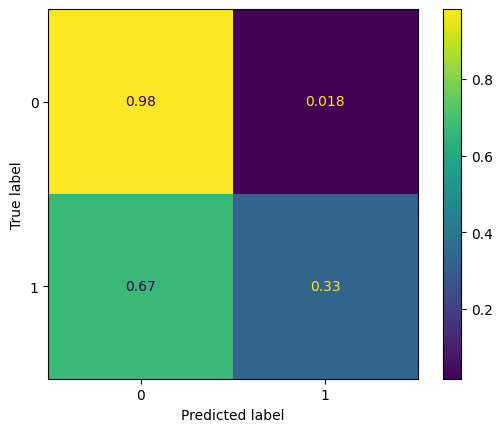

### Performing Prediction on validation data, this data se unscene data compared to train set data

In [382]:
y_val_preds = knearest.predict(x_val)

In [383]:
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.826427771556551
0.7972524917428481


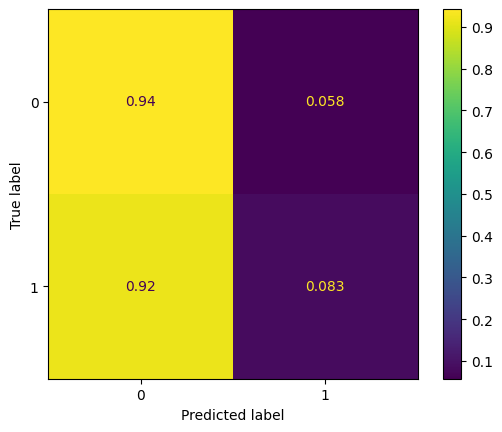

### Performing Prediction on test data, this data se unscene data compared to train and validation set data

In [384]:
y_test_preds = knearest.predict(x_test)

In [385]:
print(accuracy_score(y_test,y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))

0.8414688759516346
0.8163791854151033


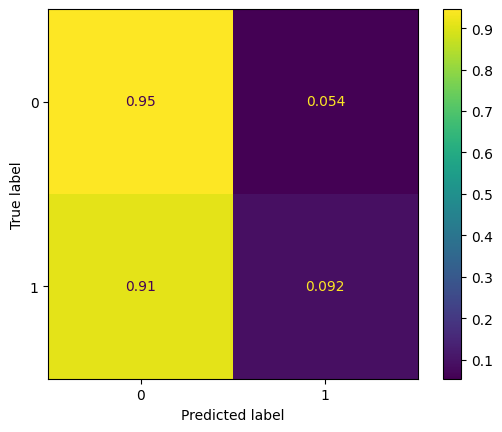

# Results of Model 1
#### accuracy score of train set is: 0.8955620887582249
#### f1 score of train set is: 0.8778733160359377
#### accuracy score of train set is: 0.826427771556551
#### f1 score of train set is: 0.7972524917428481
#### accuracy score of train set is: 0.8414688759516346
#### f1 score of train set is:  0.8163791854151033
# Result of Model : The model has scored 80% of accuracy and f1 score . This is a bit of overfitting.



# MODEL 2
#### Training second model with 55 neighbours

In [386]:
knearest_n50 = KNeighborsClassifier(n_neighbors=55, metric= 'euclidean')

In [387]:
train_fit_1 = knearest_n50.fit(x_train, y_train)

In [389]:
print(accuracy_score(y_train, y_train_preds_1))
print(f1_score(y_train, y_train_preds_1, average='weighted'))

0.867702645947081
0.8077148121989014


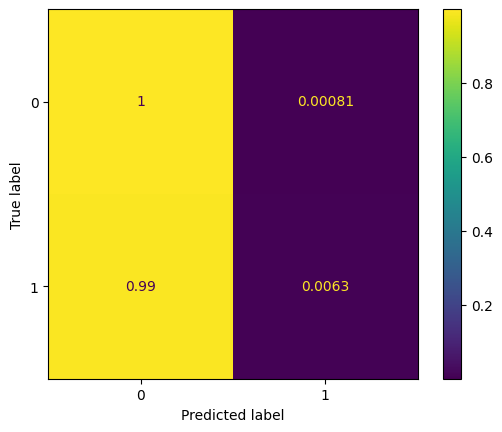

In [390]:
y_val_preds_1 = knearest_n50.predict(x_val)
print(accuracy_score(y_val, y_val_preds_1))
print(f1_score(y_val, y_val_preds_1, average='weighted'))

0.8639417693169092
0.8019165116218834


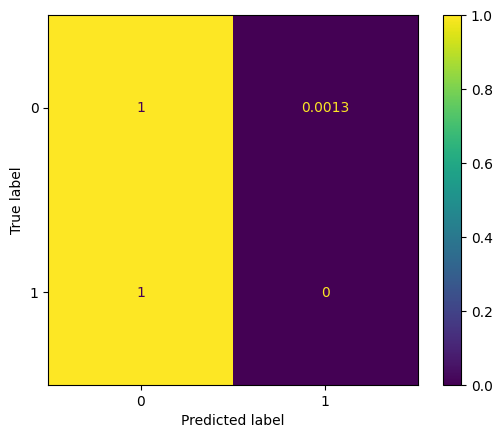

In [374]:
y_test_preds_1 = knearest.predict(x_test)
print(accuracy_score(y_test,y_test_preds_1))
print(f1_score(y_test, y_test_preds_1, average='weighted'))

0.8414688759516346
0.8163791854151033


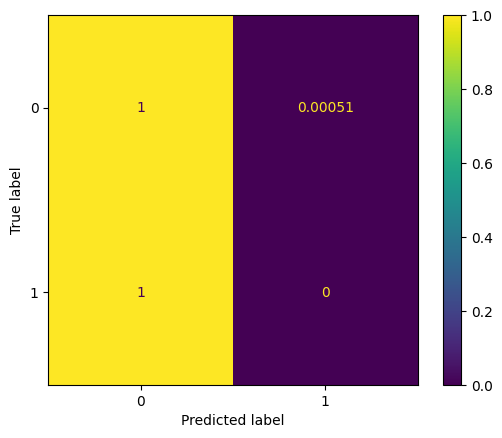

## Confusion Matrix of test set:
### Top Left : True Positive(TP), 1 value was predicted negative.
### Top Right :  True Negative (TF), 0.00051 values were predicted wrong.
### Bottom Left : False Positive (FP), 1 value was predicted wrong.
### Bottom Right : False Negative (FN), value predicted inaccurately.


# Results of Model 2
### accuracy score of train set is: 0.867702645947081
### f1 score of train set is: 0.8077148121989014
### accuracy score of train set is: 0.8639417693169092
### f1 score of train set is: 0.8019165116218834
### accuracy score of train set is: 0.8414688759516346
### f1 score of train set is:  0.8163791854151033

# Result of Model : The model has scored 80% of accuracy and f1 score . This model is well generalized and it can be used for deployment.

